In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import napari
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

from scribbles_creator import *
from cellpose_data_handler import *

## Define where the images are located and what data to consider

In [ ]:
folder_path = "./imgs/cellpose_train_imgs/24-03-08_run01"

In [ ]:
mode = "all"
bins = [0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]
all_suff = ["a", "b", "c", "d", "e", "f", "g", "h", "i", "j"]
suff = all_suff[:5]

## Create predictions/segmentations with CONVPAINT on the cellpose dataset (wit self-created scribbles)

In [ ]:
# Define the convpaint parameters
layer_list = [0]
scalings = [1, 2]

# Predictions
for img_num in range(0, 10):
    for bin in bins:
        for s in suff:
            print(f"Image {img_num}, bin {bin}, suff {s}")
            # pred = pred_cellpose_convpaint(folder_path, img_num, mode=mode, bin=bin, suff=s, layer_list=layer_list, scalings=scalings, save_res=True, show_res=False)
            # pred = pred_cellpose_ilastik(folder_path, img_num, mode=mode, bin=bin, suff=s, save_res=True, show_res=False)

# TEST ILASTIK

In [ ]:
folder_path = "./imgs/cellpose_train_imgs/24-03-08_run01"
img = np.array(Image.open(f"{folder_path}/000_img.png"))[:,:,1]
print(img.shape)
# img = np.moveaxis(img, -1, 0)
# print(img.shape)
labels = np.array(Image.open(f"{folder_path}/000_scribbles_all_0.1_a.png"))
print(labels.shape)

In [ ]:
v = napari.Viewer()
v.add_image(img, name="img")
v.add_labels(labels, name="labels")

In [ ]:
pred = pixel_classification_ilastik(img, labels, filter_set)

In [ ]:
v.add_labels(pred, name="pred")

In [ ]:
v.add_labels(np.array(Image.open(f"{folder_path}/000_convpaint_all_0.1_a.png")), name="true")

## Analyse the created scribbles and segmentations (perc. labelled vs. acc.) from saved files

In [ ]:
# df = pd.DataFrame(columns=['img_num', 'prediction type', 'scribbles mode', 'scribbles bin', 'suffix', 'class_1_pix_gt', 'class_2_pix_gt', 'pix_labelled', 'class_1_pix_labelled', 'class_2_pix_labelled', 'pix_in_img', 'perc. labelled', 'accuracy', 'image', 'ground truth', 'scribbles', 'prediction'])

# for img_num in range(0, 10):
#     for bin in bins:
#         for s in suff:
#             res = analyse_cellpose_single_file(folder_path, img_num, mode=mode, bin=bin, suff=s, pred_tag="convpaint", show_res=False)
#             df = pd.concat([df, res], ignore_index=True)

In [26]:
df = pd.DataFrame(columns=['img_num', 'prediction type', 'scribbles mode', 'scribbles bin', 'suffix', 'class_1_pix_gt', 'class_2_pix_gt', 'pix_labelled', 'class_1_pix_labelled', 'class_2_pix_labelled', 'pix_in_img', 'perc. labelled', 'accuracy', 'image', 'ground truth', 'scribbles', 'prediction'])

for img_num in range(0, 10):
    for bin in bins:
        for s in suff:
            for p in ["convpaintCh1", "ilastikCh1"]:
                res = analyse_cellpose_single_file(folder_path, img_num, mode=mode, bin=bin, suff=s, pred_tag=p, show_res=False)
                df = pd.concat([df, res], ignore_index=True)

C:\Users\roman\AppData\Local\Temp\ipykernel_12168\3805619013.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, res], ignore_index=True)


In [27]:
df[:5]

,img_num,prediction type,scribbles mode,scribbles bin,suffix,class_1_pix_gt,class_2_pix_gt,pix_labelled,class_1_pix_labelled,class_2_pix_labelled,pix_in_img,perc. labelled,accuracy,image,ground truth,scribbles,prediction
0,0,convpaintCh1,all,0.01,a,101577,94519,18,9,9,196096,0.009179,0.903532,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
1,0,ilastikCh1,all,0.01,a,101577,94519,18,9,9,196096,0.009179,0.898432,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
2,0,convpaintCh1,all,0.01,b,101577,94519,18,9,9,196096,0.009179,0.876841,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
3,0,ilastikCh1,all,0.01,b,101577,94519,18,9,9,196096,0.009179,0.857187,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
4,0,convpaintCh1,all,0.01,c,101577,94519,18,9,9,196096,0.009179,0.868442,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...


In [28]:
# Save the data frame in a csv file
from datetime import datetime
time_stamp = datetime.now().strftime("%y%m%d%H%M%S")
file_name = f"test_labels_vs_acc_{time_stamp}.csv"
df.to_csv(file_name, index=False)

## Plot

In [230]:
# Load the dataframe from the csv file
file_name = "results/test_labels_vs_acc_Ch1_240311133822.csv"
df = pd.read_csv(file_name)
df[:5]

,img_num,prediction type,scribbles mode,scribbles bin,suffix,class_1_pix_gt,class_2_pix_gt,pix_labelled,class_1_pix_labelled,class_2_pix_labelled,pix_in_img,perc. labelled,accuracy,image,ground truth,scribbles,prediction
0,0,convpaintCh1,all,0.01,a,101577,94519,18,9,9,196096,0.009179,0.903532,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
1,0,ilastikCh1,all,0.01,a,101577,94519,18,9,9,196096,0.009179,0.898432,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
2,0,convpaintCh1,all,0.01,b,101577,94519,18,9,9,196096,0.009179,0.876841,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
3,0,ilastikCh1,all,0.01,b,101577,94519,18,9,9,196096,0.009179,0.857187,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
4,0,convpaintCh1,all,0.01,c,101577,94519,18,9,9,196096,0.009179,0.868442,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...


### Only one prediction type

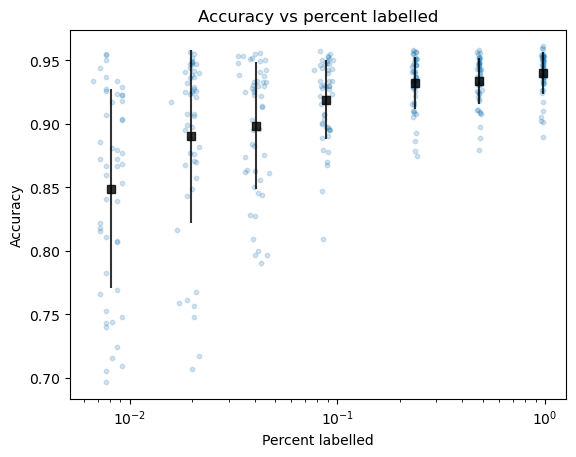

In [231]:
# Plot accuracy vs percent labelled
df_filtered = df[df['prediction type'] == "convpaintCh1"]
plt.figure()

# Scatterplot
plt.scatter(df_filtered['perc. labelled'], df_filtered['accuracy'], alpha=0.2, s=10)

# Grouped plot
df_grouped = df_filtered.groupby('scribbles bin').agg({'accuracy': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='black', alpha=0.8)
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')
plt.show()


### Both prediction types together (convpaint vs. ilastik)

In [232]:
# Adjust dataframe for plotting
df = df[df['scribbles bin'] != 0.01]
df = df[df['scribbles bin'] != 1]
# Change the values of the prediction type to be more readable
df['prediction type'] = df['prediction type'].apply(lambda x: "convpaint" if x == "convpaintCh1" else "classic filters")
# Create two filtered dataframes
df_convpaint = df[df['prediction type'] == 'convpaint']
df_ilastik = df[df['prediction type'] == 'classic filters']

In [233]:
df[:5]

,img_num,prediction type,scribbles mode,scribbles bin,suffix,class_1_pix_gt,class_2_pix_gt,pix_labelled,class_1_pix_labelled,class_2_pix_labelled,pix_in_img,perc. labelled,accuracy,image,ground truth,scribbles,prediction
10,0,convpaint,all,0.025,a,101577,94519,38,21,17,196096,0.019378,0.936113,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
11,0,classic filters,all,0.025,a,101577,94519,38,21,17,196096,0.019378,0.913808,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
12,0,convpaint,all,0.025,b,101577,94519,39,21,18,196096,0.019888,0.947995,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
13,0,classic filters,all,0.025,b,101577,94519,39,21,18,196096,0.019888,0.873128,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...
14,0,convpaint,all,0.025,c,101577,94519,40,20,20,196096,0.020398,0.936439,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...,./imgs/cellpose_train_imgs/24-03-08_run01/000_...


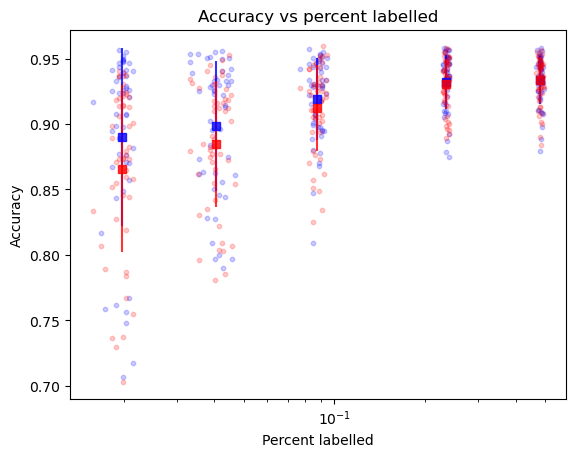

In [234]:
# Plot accuracy vs percent labelled
plt.figure()

# ADD CONVPAINT PLOT
# Scatterplot
plt.scatter(df_convpaint['perc. labelled'], df_convpaint['accuracy'], alpha=0.2, s=10, c='blue')
# Grouped plot
df_grouped = df_convpaint.groupby('scribbles bin').agg({'accuracy': ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='blue', alpha=0.8)
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['median'], yerr=0, fmt='s', c='blue', alpha=0.8)

# ADD ILASTIK PLOT
# Scatterplot
plt.scatter(df_ilastik['perc. labelled'], df_ilastik['accuracy'], alpha=0.2, s=10, c='red')
# Grouped plot
df_grouped = df_ilastik.groupby('scribbles bin').agg({'accuracy': ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['mean'], yerr=df_grouped['accuracy']['std'], fmt='s', c='red', alpha=0.8)
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped['accuracy']['median'], yerr=0, fmt='s', c='red', alpha=0.8)

# ADJUST PARAMETERS
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')
plt.show()

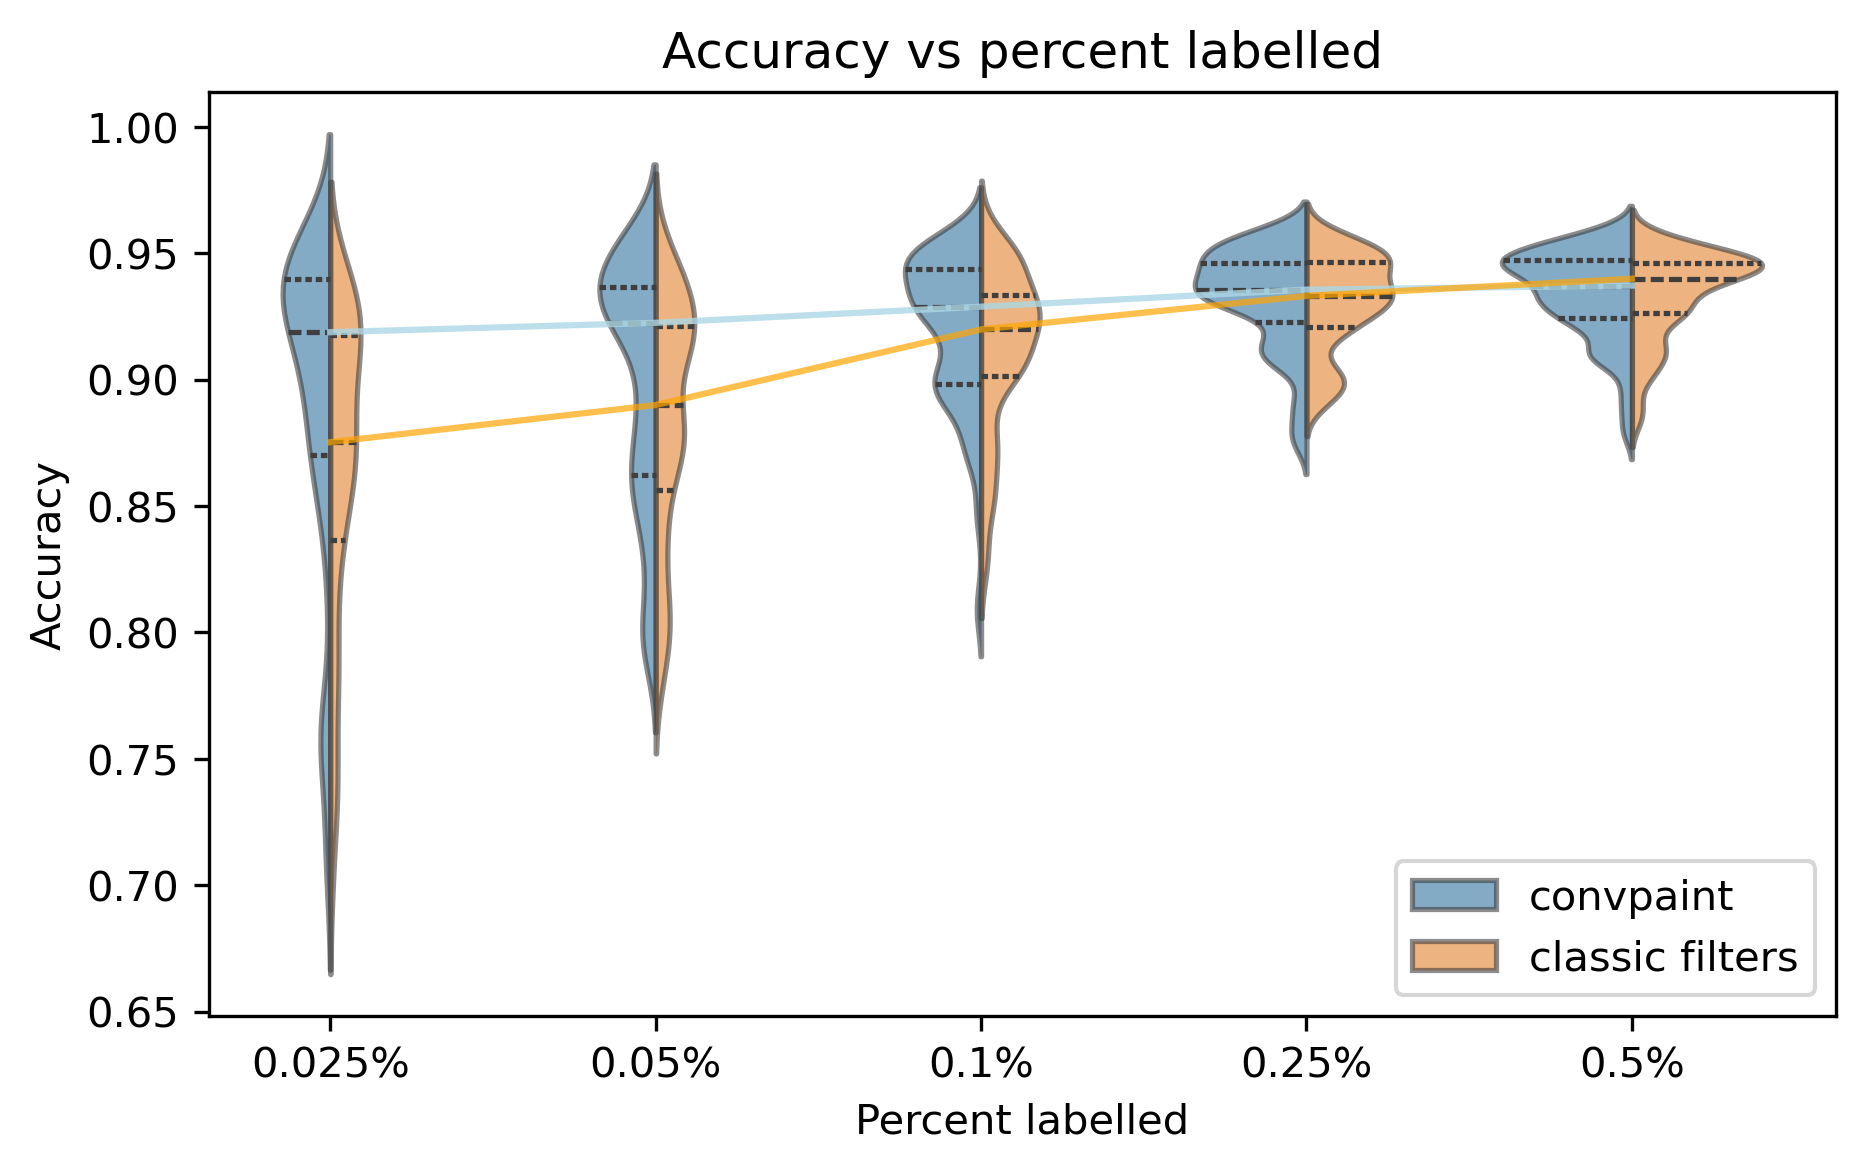

In [235]:
# Plot violin plot with seaborn split the violin between convapint and ilastik
# Group the bins
df_convpaint_grouped = df_convpaint.groupby('scribbles bin').agg({'accuracy': 'median'}).reset_index()
df_ilastik_grouped = df_ilastik.groupby('scribbles bin').agg({'accuracy': 'median'}).reset_index()
# Add a [0,0] point to the grouped dataframes manually
# df_convpaint_grouped = pd.concat([pd.DataFrame({'scribbles bin': [0], 'accuracy': [0]}), df_convpaint_grouped], ignore_index=True)
# df_ilastik_grouped = pd.concat([pd.DataFrame({'scribbles bin': [0], 'accuracy': [0]}), df_ilastik_grouped], ignore_index=True)
# df = df.append({'scribbles bin': 0, 'accuracy': 0, 'prediction type': 'convpaint'}, ignore_index=True)
# df = df.append({'scribbles bin': 0, 'accuracy': 0, 'prediction type': 'classic filters'}, ignore_index=True)

plt.figure(figsize=(7, 4), dpi=300)

# Create the violin plot
ax = sns.violinplot(x='scribbles bin', y='accuracy', data=df, hue='prediction type', split=True, alpha=0.6, inner="quart", bw_adjust=0.65)

# Plot the means of each bin and connect them with a line
x_positions = ax.get_xticks()
plt.plot(x_positions, df_convpaint_grouped['accuracy'], color='lightblue', alpha=0.8)
plt.plot(x_positions, df_ilastik_grouped['accuracy'], color='orange', alpha=0.7)

# Set some parameters
x_labels = [f"{x}%" for x in df_convpaint_grouped['scribbles bin']]
plt.xticks(x_positions, x_labels)
plt.legend(loc='lower right')
plt.xlabel('Percent labelled')
plt.ylabel('Accuracy')
plt.title('Accuracy vs percent labelled')

# Show or save the plot
plt.show()
# plt.savefig("convpaint-vs-ilastik_acc-vs-lab.svg", format='svg')